In [19]:
from Node import Node, from_csv

import os.path as osp

# Thuật toán

In [2]:
from PriorityQueue import PriorityQueue
from math import inf

def _construct_path(previous: dict[str, Node], source: Node, target: Node):
    if not target.id in previous: return []
    
    path = [target]
    while target != source:
        target = previous[target.id]
        path.append(target)
    return list(reversed(path))

def dijkstra(nodes: dict[str, tuple[int, Node]], adjacency_matrix: list[list[float]],
             source: Node, target: Node, *,
             do_UCS: bool = False) -> tuple[float, list[Node]]:
    my_queue: PriorityQueue[Node] = PriorityQueue()
    previous: dict[str, Node] = {}

    if do_UCS:
        source.distance = 0
        my_queue.push(source)
    else:
        for _, node in nodes.values():
            if node == source: source.distance = 0
            else: node.distance = inf
            my_queue.push(node)

    while my_queue:
        cur = my_queue.pop()

        if cur == target: break

        for neighbour in cur.neighbours:
            neighbour_index, cur_index = nodes[neighbour.id][0], nodes[cur.id][0]
            other_dist = cur.distance + adjacency_matrix[neighbour_index][cur_index]
            if other_dist < neighbour.distance:
                neighbour.distance = other_dist
                previous[neighbour.id] = cur
                my_queue.push(neighbour)

    return target.distance, _construct_path(previous, source, target)

In [21]:
filename = osp.join('.', 'demo_data', 'Graph.csv')
my_nodes, adj_mat = from_csv(filename)
my_nodes

{'0': (0, <Node.Node at 0x1883e2f7380>),
 '2': (1, <Node.Node at 0x1882dbe6800>),
 '1': (2, <Node.Node at 0x1883f98c800>),
 '3': (3, <Node.Node at 0x1883f98e380>),
 '5': (4, <Node.Node at 0x1883f98e280>),
 '4': (5, <Node.Node at 0x1883f98e680>),
 '7': (6, <Node.Node at 0x1883f98c1c0>),
 '6': (7, <Node.Node at 0x1883f98d080>),
 '9': (8, <Node.Node at 0x1883f98e2c0>),
 '8': (9, <Node.Node at 0x1883f98e340>)}

In [22]:
source, target = my_nodes['0'][1], my_nodes['9'][1]
dist, path = dijkstra(my_nodes, adj_mat, source, target)
print(f"Khoảng cách đường đi ngắn nhất: {dist}")
print(f"Đường đi: {path[0].id}", end=' ')
for node in path[1:]:
    print(f"-> {node.id}", end=' ')

Khoảng cách đường đi ngắn nhất: 5.3
Đường đi: 0 -> 8 -> 7 -> 9 

# Biểu diễn kết quả

In [ ]:
from csv import reader
from collections import defaultdict

import matplotlib.pyplot as plt
import networkx as nx

highlight_color = (1, 0, 0)

def draw_result(filename: str, path: list[Node], *, ax = plt.gca()) -> None:
    connections = defaultdict(list)
    with open(filename, 'r') as csv_file:
        lines = list(reader(csv_file, delimiter=','))
    for v_from, v_to, _ in lines: connections[v_from].append(v_to)

    my_graph = nx.graph.Graph(connections)
    node_pos = nx.kamada_kawai_layout(my_graph)

    highlight_edges = []
    for i, node in enumerate(path[:-1]):
        highlight_edges.append((node.id, path[i + 1].id))
    highlight_edges_color = [highlight_color] * len(highlight_edges)

    edge_labels = {}
    for edge in my_graph.edges:
        edge_labels[edge] = adj_mat[my_nodes[edge[0]][0]][my_nodes[edge[1]][0]]

    nx.draw_networkx_nodes(my_graph, node_pos)
    nx.draw_networkx_labels(my_graph, node_pos)
    nx.draw_networkx_edges(my_graph, node_pos)
    nx.draw_networkx_edges(my_graph, node_pos, highlight_edges,
                           edge_color=highlight_edges_color,
                           arrows=True, arrowstyle='-|>')
    nx.draw_networkx_edge_labels(my_graph, node_pos, edge_labels=edge_labels)

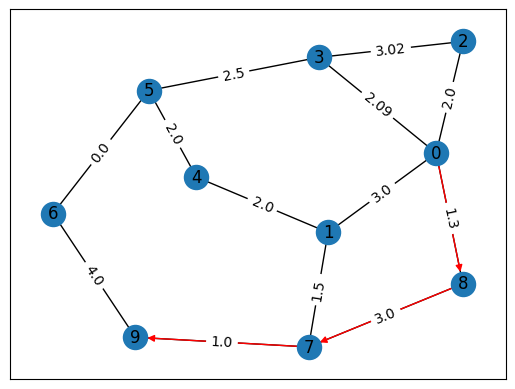

In [23]:
draw_result(filename, path)